# Getting a sense of the size of the data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import _pickle as cPickle
import csv


In [1]:


#bucket='ewasunhealthy'
#data_key = 'disease_methylation.txt'
#data_location = 's3://{}/{}'.format(bucket, data_key)
data_location = 'disease_methylation.txt'

#Opening patient statusinfor
#with open('data_location', newline='') as csvfile:
    #data = list(csv.reader(csvfile))
#df = pd.read_csv(data_location, usecols=[0,1,2,3,4,5,6,7], sep='\t', nrows=2)  
df = pd.read_csv(data_location, sep='\t',nrows=5,index_col=0)
df

,GSM1068826,GSM1068827,GSM1068829,GSM1068832,GSM1068833,GSM1068834,GSM1068835,GSM1068838,GSM1068839,GSM1068840,...,GSM1655185,GSM1344570,GSM1344687,GSM2125509,GSM2334025,GSM2190544.1,GSM1871195,GSM990041.1,GSM1506396,GSM1886655
sample_id,,,,,,,,,,,,,,,,,,,,,
disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,...,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis,Ulcerative colitis
tissue,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,brain - cerebellum,...,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood
sample_type,case,case,case,case,case,case,case,case,case,case,...,control,control,control,control,control,control,control,control,control,control
cg00050873,NaN,NaN,NaN,NaN,0.819,0.757,0.806,NaN,0.814,0.814,...,NaN,NaN,0.835,0.822,NaN,NaN,0.851,0.881,NaN,NaN
cg00212031,NaN,NaN,NaN,NaN,0.009,0.011,0,NaN,0.026,0.018,...,NaN,NaN,0.02,0.048,NaN,NaN,0.043,0.025,NaN,NaN


In [2]:
unhealthy_meta=df.T
unhealthy_meta

sample_id,disease,tissue,sample_type,cg00050873,cg00212031
GSM1068826,Alzheimer's disease,brain - cerebellum,case,NaN,NaN
GSM1068827,Alzheimer's disease,brain - cerebellum,case,NaN,NaN
GSM1068829,Alzheimer's disease,brain - cerebellum,case,NaN,NaN
GSM1068832,Alzheimer's disease,brain - cerebellum,case,NaN,NaN
GSM1068833,Alzheimer's disease,brain - cerebellum,case,0.819,0.009
...,...,...,...,...,...
GSM2190544.1,Ulcerative colitis,whole blood,control,NaN,NaN
GSM1871195,Ulcerative colitis,whole blood,control,0.851,0.043
GSM990041.1,Ulcerative colitis,whole blood,control,0.881,0.025
GSM1506396,Ulcerative colitis,whole blood,control,NaN,NaN


In [3]:
unhealthy_ids=unhealthy_meta.index.tolist()

In [4]:
unhealthy_ids=unhealthy_ids[1:]
unhealthy_meta[:]['disease'].value_counts()



Alzheimer's disease                                 1809
schizophrenia                                       1362
systemic lupus erythematosus                        1052
rheumatoid arthritis                                 842
Ulcerative colitis                                   822
Parkinson's disease                                  738
preeclampsia                                         692
Crohn's disease                                      624
respiratory allergy                                  549
asthma                                               509
childhood asthma                                     495
multiple sclerosis                                   447
Down syndrome                                        436
Graves' disease                                      417
Huntington's disease                                 406
intellectual disability and congenital anomalies     400
systemic insulin resistance                          395
stroke                         

In [5]:
count_series = unhealthy_meta.groupby(['disease', 'tissue']).size()

# Extracting useful data

In [7]:
#Column values for relevant data
id_alzheimers_blood=[]
id_parkinsons_blood=[]

for i in unhealthy_ids:
    if unhealthy_meta.loc[i]['disease']=="Alzheimer's disease" and unhealthy_meta.loc[i]['tissue']=="whole blood":
        id_alzheimers_blood.append(i)
        
    if unhealthy_meta.loc[i]['disease']=="Parkinson's disease" and unhealthy_meta.loc[i]['tissue']=="whole blood":
        id_parkinsons_blood.append(i)
        
    
    

# Getting ages

In [13]:
#meta = pd.read_csv('sample_disease.txt', delimiter = '\t')
meta = []

with open(r'sample_disease.txt') as f:
    for row in f:
        meta.append(row[0:50])
    
meta_2=[]
for i in meta:
    meta_2.append(i.split())
    
ages=[]
df_id_ages=[]
df_age=[]
for i in range(1,len(meta_2)):
    p=meta_2[i]
    v=[]
    v.append(p[0][1:-1])
    v.append(p[2])
    df_id_ages.append(p[0][1:-1])
    df_age.append(p[2])
    ages.append(v)
    
    
df_ages = pd.DataFrame({'id': df_id_ages,
                   'age': df_age,})

df_ages=df_ages.set_index('id')
df_ages

,age
id,
GSM1068826,88
GSM1068827,92
GSM1068829,93
GSM1068832,96
GSM1068833,86
...,...
GSM2190544.1,0
GSM1871195,74.4
GSM990041.1,69


# Alzheimer's whole blood - all

In [37]:
#
col=['sample_id']+id_alzheimers_blood
alz_all = pd.read_csv('disease_methylation.txt', delimiter = '\t', usecols=col, low_memory=False)
alz_all=alz_all.set_index('sample_id')
alz_all

,GSM1069225,GSM1069226,GSM1069227,GSM1069228,GSM1069229,GSM1069232,GSM1069235,GSM1069239,GSM1069240,GSM1069243,...,GSM990062,GSM3035460,GSM3035824,GSM1871051,GSM1870556,GSM1870611,GSM3035793,GSM1870291,GSM1299778,GSM990589
sample_id,,,,,,,,,,,,,,,,,,,,,
disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,...,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease,Alzheimer's disease
tissue,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,...,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood
sample_type,case,case,case,case,case,case,case,case,case,case,...,control,control,control,control,control,control,control,control,control,control
cg00050873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.853,0.818,0.842,0.851,0.835,0.844,0.835,0.844,0.876,0.886
cg00212031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.021,0.029,0.072,0.06,0.042,0.065,0.042,0.065,0.026,0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg04112173,0.965,0.986,0.982,0.98,0.991,0.99,0.975,0.976,0.99,0.972,...,0.973,0.96,0.971,0.969,0.972,0.978,0.97,0.978,0.95,0.953
cg04112590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.829,NaN,NaN,NaN,NaN,NaN,0.876,0.796
cg04112626,NaN,NaN,NaN,0.275,NaN,0.157,0.226,0.133,NaN,0.125,...,0.168,0.117,0.133,0.104,0.122,0.13,0.107,0.13,0.17,0.096


In [38]:
alz_all=alz_all.T
alz_all['AGE']=np.zeros(len(id_alzheimers_blood))
cols = list(alz_all.columns.values)
cols=cols[0:-1]
alz_all = alz_all[['AGE']+cols]
alz_all



sample_id,AGE,disease,tissue,sample_type,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg04103088,cg04105342,cg04106633,cg04107037,cg04111054,cg04112173,cg04112590,cg04112626,cg04113154,cg04114386
GSM1069225,0.0,Alzheimer's disease,whole blood,case,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.224,0.951,0.05,NaN,0.965,NaN,NaN,0.991,NaN
GSM1069226,0.0,Alzheimer's disease,whole blood,case,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.197,0.837,0.04,NaN,0.986,NaN,NaN,0.984,NaN
GSM1069227,0.0,Alzheimer's disease,whole blood,case,NaN,NaN,NaN,NaN,NaN,NaN,...,0.979,0.12,0.957,0.024,NaN,0.982,NaN,NaN,0.989,NaN
GSM1069228,0.0,Alzheimer's disease,whole blood,case,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.241,0.863,0.091,NaN,0.98,NaN,0.275,0.992,NaN
GSM1069229,0.0,Alzheimer's disease,whole blood,case,NaN,NaN,NaN,NaN,NaN,NaN,...,0.993,0.11,0.947,0.024,NaN,0.991,NaN,NaN,0.989,0.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1870611,0.0,Alzheimer's disease,whole blood,control,0.844,0.065,NaN,0.032,0.771,0.127,...,NaN,0.184,0.884,0.021,NaN,0.978,NaN,0.13,0.98,0.95
GSM3035793,0.0,Alzheimer's disease,whole blood,control,0.835,0.042,NaN,0.052,0.78,0.061,...,NaN,0.238,0.931,0.034,NaN,0.97,NaN,0.107,0.986,NaN
GSM1870291,0.0,Alzheimer's disease,whole blood,control,0.844,0.065,NaN,0.032,0.771,0.127,...,NaN,0.184,0.884,0.021,NaN,0.978,NaN,0.13,0.98,0.95
GSM1299778,0.0,Alzheimer's disease,whole blood,control,0.876,0.026,NaN,0.033,0.722,0.055,...,0.978,0.231,0.901,0.028,NaN,0.95,0.876,0.17,0.975,0.968


In [39]:
for i in id_alzheimers_blood:
    try:
        alz_all.loc[i,'AGE']=float(df_ages.loc[i]['age'])
    except KeyError:
        alz_all.loc[i,'AGE']='NaN'
alz_all

alz_all.to_csv('alz_all.csv', encoding='utf-8', index=True)

In [41]:
alz_all=alz_all.drop(columns=['disease'])
alz_all=alz_all.drop(columns=['tissue'])
alz_all=alz_all.drop(columns=['sample_type'])

In [42]:
alz_all

sample_id,AGE,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,...,cg04103088,cg04105342,cg04106633,cg04107037,cg04111054,cg04112173,cg04112590,cg04112626,cg04113154,cg04114386
GSM1069225,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.224,0.951,0.05,NaN,0.965,NaN,NaN,0.991,NaN
GSM1069226,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.197,0.837,0.04,NaN,0.986,NaN,NaN,0.984,NaN
GSM1069227,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.979,0.12,0.957,0.024,NaN,0.982,NaN,NaN,0.989,NaN
GSM1069228,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.241,0.863,0.091,NaN,0.98,NaN,0.275,0.992,NaN
GSM1069229,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.993,0.11,0.947,0.024,NaN,0.991,NaN,NaN,0.989,0.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1870611,75.9,0.844,0.065,NaN,0.032,0.771,0.127,0.013,0.956,0.95,...,NaN,0.184,0.884,0.021,NaN,0.978,NaN,0.13,0.98,0.95
GSM3035793,80.0,0.835,0.042,NaN,0.052,0.78,0.061,0.017,0.955,0.994,...,NaN,0.238,0.931,0.034,NaN,0.97,NaN,0.107,0.986,NaN
GSM1870291,75.9,0.844,0.065,NaN,0.032,0.771,0.127,0.013,0.956,0.95,...,NaN,0.184,0.884,0.021,NaN,0.978,NaN,0.13,0.98,0.95
GSM1299778,70.0,0.876,0.026,NaN,0.033,0.722,0.055,0.019,0.934,0.98,...,0.978,0.231,0.901,0.028,NaN,0.95,0.876,0.17,0.975,0.968


In [44]:
alz_all.to_csv('alz_all.csv', encoding='utf-8', index=True)

# Parkinsons whole blood - XGBoost top

In [46]:
col=['sample_id']+id_parkinsons_blood
park_all = pd.read_csv('disease_methylation.txt', delimiter = '\t', usecols=col, low_memory=False)


In [47]:
park_all=park_all.set_index('sample_id')
park_all

,GSM3035963,GSM3035809,GSM3035847,GSM1870906,GSM1871363,GSM3035565,GSM3035588,GSM1871339,GSM3035499,GSM1870491,...,GSM1871041,GSM2250409,GSM1466011,GSM1344809,GSM1343991,GSM1506296,GSM1871002.1,GSM1870956,GSM1871053,GSM1870775
sample_id,,,,,,,,,,,,,,,,,,,,,
disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,...,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease,Parkinson's disease
tissue,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,...,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood,whole blood
sample_type,case,case,case,case,case,case,case,case,case,case,...,control,control,control,control,control,control,control,control,control,control
cg00050873,0.925,0.863,0.893,0.897,NaN,NaN,NaN,0.863,0.872,0.856,...,0.875,0.857,NaN,0.889,0.88,NaN,NaN,0.916,0.853,NaN
cg00212031,NaN,0.118,0.038,0.014,NaN,NaN,NaN,0.117,0.041,0.008,...,0.047,0.057,NaN,0.049,0.045,NaN,NaN,0.026,0.077,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg04112173,0.979,0.974,0.979,0.988,0.967,0.933,0.977,0.969,0.959,0.984,...,0.986,0.988,0.959,0.948,0.967,0.953,0.991,0.987,0.985,0.973
cg04112590,NaN,0.874,NaN,NaN,NaN,NaN,NaN,0.895,NaN,NaN,...,NaN,NaN,NaN,NaN,0.808,NaN,0.875,NaN,NaN,NaN
cg04112626,0.056,0.119,0.077,0.104,0.111,0.127,0.075,0.108,0.112,0.09,...,0.087,0.113,0.188,0.214,0.143,0.153,0.21,0.117,0.198,0.134


In [48]:
park_all=park_all.T
park_all['AGE']=np.zeros(len(id_parkinsons_blood))
cols = list(park_all.columns.values)
cols=cols[0:-1]
park_all = park_all[['AGE']+cols]
for i in id_parkinsons_blood:
    try:
        park_all.loc[i,'AGE']=float(df_ages.loc[i]['age'])
    except KeyError:
        park_all.loc[i]['AGE']='NaN'

In [49]:
park_all.to_csv('park_all.csv', encoding='utf-8', index=True)

In [51]:
park_all=park_all.drop(columns=['disease'])
park_all=park_all.drop(columns=['tissue'])
park_all=park_all.drop(columns=['sample_type'])
park_all.to_csv('park_all.csv', encoding='utf-8', index=True)

# Alzheimer's and Parkinson's age distributions

Text(0.5, 1.0, "Alzheimer's ages")

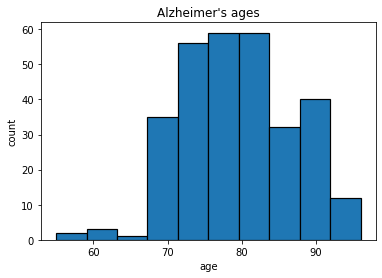

In [170]:
counts, bins = np.histogram(alz_bld_top_xboost['AGE'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts,edgecolor='black', linewidth=1.2)
plt.xlabel('age')
plt.ylabel('count')
plt.title("Alzheimer's ages")

Text(0.5, 1.0, "Parkinson's ages")

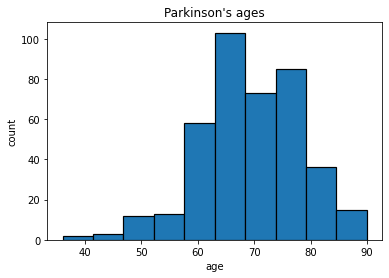

In [171]:
counts, bins = np.histogram(park_bld_top_xboost['AGE'].astype(float).astype(int))
plt.hist(bins[:-1], bins, weights=counts,edgecolor='black', linewidth=1.2)
plt.xlabel('age')
plt.ylabel('count')
plt.title("Parkinson's ages")

# Alzheimer's fitting a linear model

In [260]:
alz_bld_top_xboost_no_na = alz_bld_top_xboost.dropna(axis='columns')
alz_bld_top_xboost_no_na

sample_id,AGE,cg00298532,cg00311307,cg01074797,cg01101873,cg01413566,cg01428437,cg01803759,cg02494066,cg02931001,...,cg24628310,cg24701270,cg25478614,cg25693132,cg26158023,cg27425383,cg27622679,cg01826897,cg01927162,cg03814093
GSM1069225,81.0,0.946,0.086,0.525,0.459,0.780,0.654,0.792,0.665,0.178,...,0.363,0.125,0.488,0.471,0.166,0.820,0.341,0.028,0.954,0.203
GSM1069226,88.0,0.940,0.078,0.582,0.431,0.799,0.648,0.810,0.714,0.173,...,0.423,0.099,0.412,0.430,0.198,0.821,0.397,0.026,0.969,0.232
GSM1069227,91.0,0.945,0.066,0.558,0.507,0.813,0.625,0.867,0.743,0.170,...,0.403,0.089,0.464,0.511,0.108,0.801,0.329,0.027,0.962,0.116
GSM1069228,87.0,0.953,0.067,0.583,0.541,0.826,0.708,0.865,0.722,0.199,...,0.385,0.182,0.474,0.709,0.191,0.787,0.485,0.028,0.966,0.172
GSM1069229,89.0,0.922,0.049,0.519,0.322,0.815,0.646,0.745,0.693,0.169,...,0.370,0.056,0.343,0.419,0.183,0.787,0.421,0.024,0.967,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1870611,75.9,0.940,0.093,0.519,0.495,0.815,0.666,0.810,0.664,0.178,...,0.360,0.141,0.358,0.484,0.183,0.838,0.410,0.010,0.948,0.183
GSM3035793,80.0,0.952,0.083,0.465,0.435,0.807,0.718,0.762,0.665,0.159,...,0.353,0.130,0.470,0.470,0.183,0.817,0.298,0.017,0.970,0.126
GSM1870291,75.9,0.940,0.093,0.519,0.495,0.815,0.666,0.810,0.664,0.178,...,0.360,0.141,0.358,0.484,0.183,0.838,0.410,0.010,0.948,0.183
GSM1299778,70.0,0.947,0.126,0.398,0.475,0.803,0.681,0.841,0.734,0.162,...,0.333,0.096,0.359,0.596,0.175,0.816,0.445,0.030,0.925,0.136


In [261]:
X = alz_bld_top_xboost_no_na.iloc[:, 1:].to_numpy()
y = alz_bld_top_xboost_no_na[['AGE']].astype(float).astype(int)

In [262]:
X.shape

(299, 719)

In [263]:
y.shape

(299, 1)

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 4, shuffle=True)

In [265]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(209, 719) (90, 719) (209, 1) (90, 1)


In [256]:
# Run Linear Regression model and plot and print results
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
def linear_regress(X_train,  X_test, y_train, y_test, plot=True,xmin=50,xmax=100):
    
    #Build fit model
    mod = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs='None')
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = sqrt(mean_squared_error(y_train, preds_train))
    rms_test = sqrt(mean_squared_error(y_test, preds_test))
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot progress over epochs and final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(25,6))
        ax[0].scatter(y_train, preds_train, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Linear Regression on training data')

        ax[1].scatter(y_test, preds_test, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Linear Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test



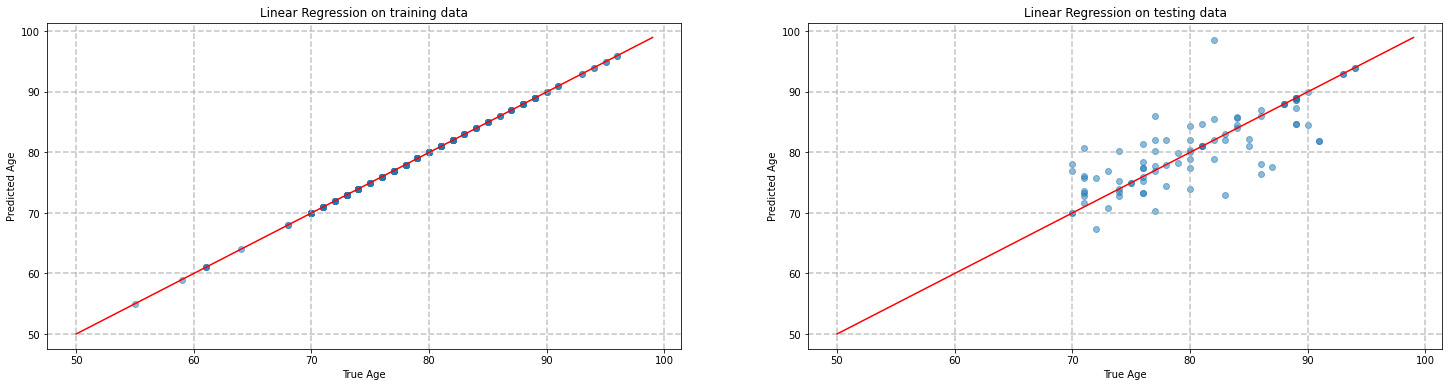

The rms on the training data is 0.000 years
The rms on the testing data is 4.215 years
The r^2 on the training data is 1.000
The r^2 on the testing data is 0.604


In [266]:
mod, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, X_test, Y_train, Y_test)

In [258]:
# Function for running a lasso Regression model with CV on alpha
# and plot and print results
from sklearn.linear_model import LassoCV
def lassoCV_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = mod = LassoCV(alphas=alphas,cv=cv)
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[0].scatter(y_train, preds_train, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Lasso Regression on training data')

        ax[1].scatter(y_test, preds_test, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Lasso Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8501427181141388, tolerance: 0.9189209580838326
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6782185173291495, tolerance: 0.9189209580838326
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might 

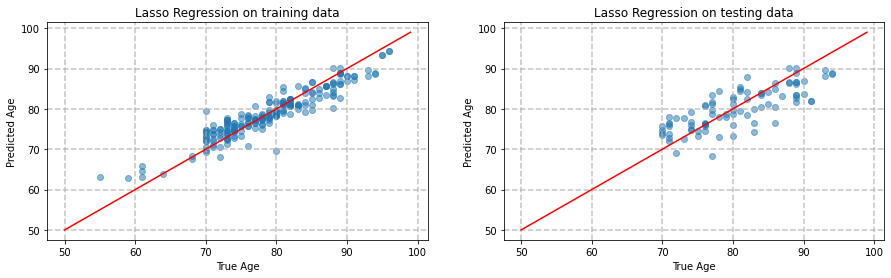

The rms on the training data is 2.640 years
The rms on the testing data is 4.204 years
The r^2 on the training data is 0.869
The r^2 on the testing data is 0.606


In [267]:
mod, rms_train, rms_test, r2_train, r2_test = lassoCV_regress(X_train, X_test, Y_train, Y_test)

In [268]:
# Looking at lasso and the weights for each CpG site

cgs_series = pd.Series(mod.coef_, index=alz_bld_top_xboost_no_na.columns[1:])

In [269]:
# Returning those that weren't set to 0 by lasso
cgs_kept_lasso_alz = cgs_series[abs(cgs_series)>0]

In [270]:
cgs_kept_lasso_alz 

sample_id
cg01101873     3.652555
cg01413566     4.093770
cg01428437    -6.477894
cg02494066    -2.834086
cg04289036    -4.320604
                ...    
cg08661007     2.666616
cg12623930    -7.295522
cg13273097     0.075860
cg25478614    11.331997
cg27622679    -1.466092
Length: 95, dtype: float64

# Parkinson's fitting a linear model

In [271]:
park_bld_top_xboost_no_na = park_bld_top_xboost.dropna(axis='columns')
park_bld_top_xboost_no_na

sample_id,AGE,cg00298532,cg01074797,cg01101873,cg01413566,cg01428437,cg01803759,cg02494066,cg02931001,cg03397716,...,cg21746724,cg21899500,cg22620111,cg22927302,cg23043139,cg23320649,cg24628310,cg25693132,cg27425383,cg03814093
GSM3035963,78.0,0.947,0.528,0.439,0.767,0.623,0.766,0.735,0.151,0.042,...,0.886,0.461,0.845,0.586,0.622,0.431,0.352,0.342,0.854,0.252
GSM3035809,78.0,0.952,0.581,0.464,0.824,0.680,0.857,0.704,0.167,0.092,...,0.798,0.625,0.836,0.534,0.699,0.495,0.434,0.490,0.872,0.262
GSM3035847,75.0,0.973,0.532,0.407,0.826,0.668,0.711,0.753,0.134,0.076,...,0.783,0.587,0.883,0.513,0.628,0.464,0.391,0.471,0.842,0.092
GSM1870906,71.4,0.946,0.555,0.360,0.792,0.714,0.757,0.703,0.132,0.123,...,0.892,0.557,0.882,0.541,0.670,0.492,0.347,0.482,0.831,0.212
GSM1871363,76.2,0.972,0.640,0.588,0.813,0.675,0.832,0.697,0.162,0.073,...,0.833,0.771,0.880,0.563,0.677,0.501,0.317,0.693,0.867,0.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1506296,68.0,0.972,0.572,0.446,0.797,0.680,0.796,0.775,0.155,0.117,...,0.860,0.703,0.790,0.544,0.711,0.474,0.313,0.602,0.788,0.122
GSM1871002.1,62.5,0.955,0.624,0.518,0.795,0.706,0.839,0.767,0.179,0.122,...,0.838,0.605,0.885,0.644,0.728,0.619,0.406,0.534,0.843,0.188
GSM1870956,69.7,0.959,0.619,0.464,0.795,0.726,0.646,0.720,0.187,0.129,...,0.843,0.569,0.857,0.451,0.676,0.536,0.332,0.436,0.841,0.069
GSM1871053,64.5,0.955,0.636,0.473,0.836,0.722,0.839,0.754,0.152,0.065,...,0.832,0.649,0.893,0.579,0.772,0.590,0.369,0.580,0.877,0.175


In [274]:
X = park_bld_top_xboost_no_na.iloc[:, 1:].to_numpy()
y = park_bld_top_xboost_no_na[['AGE']].astype(float).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 4, shuffle=True)

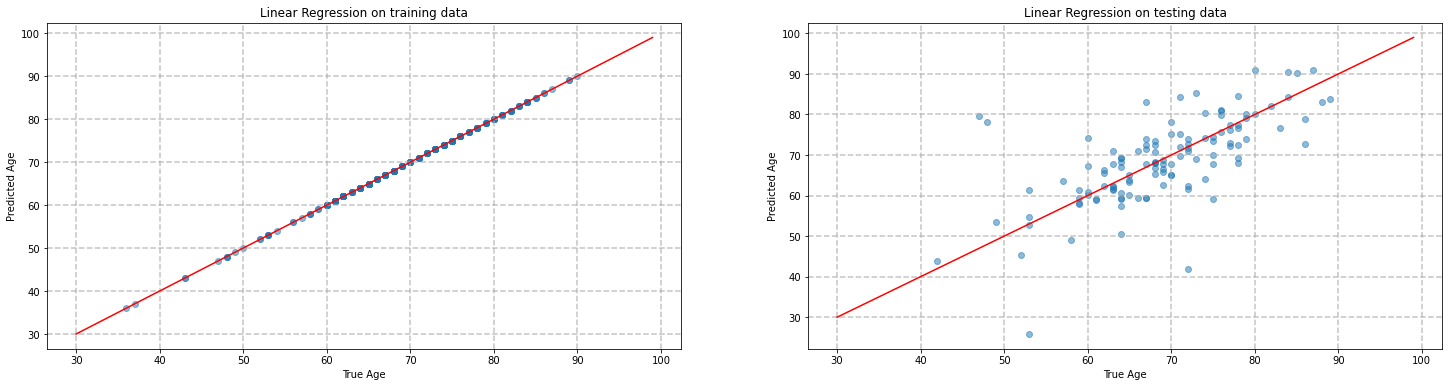

The rms on the training data is 0.000 years
The rms on the testing data is 7.875 years
The r^2 on the training data is 1.000
The r^2 on the testing data is 0.239


In [275]:
mod, rms_train, rms_test, r2_train, r2_test = linear_regress(X_train, X_test, Y_train, Y_test,xmin=30,xmax=100)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.637725042726828, tolerance: 2.0001245535714283
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.321323389898197, tolerance: 2.0001245535714283
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might wa

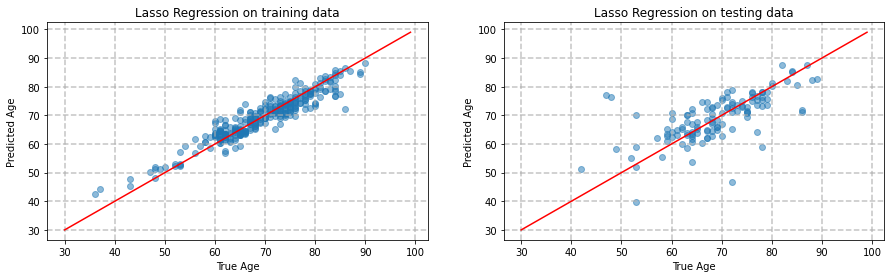

The rms on the training data is 3.107 years
The rms on the testing data is 6.967 years
The r^2 on the training data is 0.887
The r^2 on the testing data is 0.404


In [277]:
mod, rms_train, rms_test, r2_train, r2_test = lassoCV_regress(X_train, X_test, Y_train, Y_test,xmin=30,xmax=100)

In [279]:
# Looking at lasso and the weights for each CpG site

cgs_series_park = pd.Series(mod.coef_, index=park_bld_top_xboost_no_na.columns[1:])
# Returning those that weren't set to 0 by lasso
cgs_kept_lasso_park = cgs_series_park[abs(cgs_series_park)>0]
cgs_kept_lasso_park

sample_id
cg01074797   -0.566589
cg01803759    1.085803
cg03397716    3.496821
cg11987231   -2.895000
cg13806070    0.843085
                ...   
cg04474832   -8.159452
cg05541640   -4.440858
cg21899500    6.582687
cg22620111    4.301328
cg23320649   -0.263647
Length: 93, dtype: float64

In [307]:
park_lasso_cpg_names=list(cgs_kept_lasso_park.index)
alz_lasso_cpg_names=list(cgs_kept_lasso_alz.index)
both_lasso=[]
for i in park_lasso_cpg_names:
    if i in alz_lasso_cpg_names:
        both_lasso.append(i)

In [308]:
len(both_lasso)

26

In [356]:
for i in both_lasso:
    print(i)

cg11987231
cg27222785
cg20495333
cg23606718
cg25731401
cg07553761
cg10616795
cg16867657
cg19149031
cg07927379
cg13493048
cg23091758
cg04875128
cg00962707
cg14692377
cg15223933
cg24983120
cg00002033
cg04295144
cg05213896
cg06437747
cg16297569
cg22948959
cg24865132
cg14674720
cg22112832


# XGBoost


In [290]:
# Function for running XGboost regression and print results
from xgboost import XGBRegressor
def xgboost_regress(X_train, X_test, y_train, y_test, early_stopping_rounds=None, plot=True,xmin=30,xmax=100):
    
    #Build fit model
    XG = XGBRegressor(objective='reg:squarederror')
    eval_set = [(X_train, y_train),(X_test, y_test)]
    XG.fit(X_train, y_train, eval_metric="rmse", early_stopping_rounds = early_stopping_rounds,
               eval_set=eval_set, verbose=False)
    
    # Make predictions and evaluate
    preds_train = XG.predict(X_train)
    preds_test = XG.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    results = XG.evals_result()
    epochs = len(results['validation_0']['rmse'])
    
    # Plot progress over epochs and final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,3, figsize=(30,6))
        ax[0].scatter(y_train, preds_train, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('XGboost on training data')

        ax[1].scatter(y_test, preds_test, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('XGboost on testing data')

        x_axis = range(0, epochs)
        ax[2].plot(x_axis, results['validation_0']['rmse'], label='Train')
        ax[2].plot(x_axis, results['validation_1']['rmse'], label='Test')
        ax[2].legend()
        ax[2].set_ylabel('rms')
        ax[2].set_xlabel('epoch')
        ax[2].set_title('XGBoost rms')
        plt.show()
    
    # print metric
    print(f'The number of training epochs was {epochs}')
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return XG, rms_train, rms_test, r2_train, r2_test, XG.feature_importances_

In [311]:
X = park_bld_top_xboost_no_na.iloc[:, 1:].to_numpy()
y = park_bld_top_xboost_no_na[['AGE']].astype(float).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 4, shuffle=True)

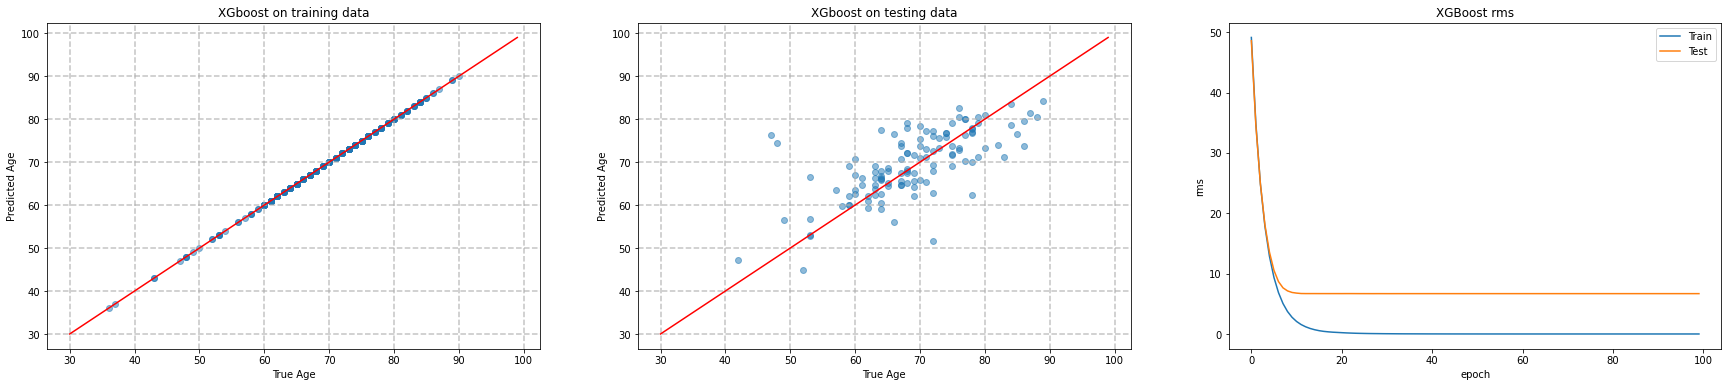

The number of training epochs was 100
The rms on the training data is 0.000 years
The rms on the testing data is 6.685 years
The r^2 on the training data is 1.000
The r^2 on the testing data is 0.451


In [312]:
# Running XGBoost regressor with default settings on
XG, rms_train_xg, rms_test_xg, r2_train_xg, r2_test_xg, feature_importances_xg = xgboost_regress(X_train, X_test, Y_train, Y_test, early_stopping_rounds=None, plot=True)

In [313]:
cgs_xgb_park = pd.Series(feature_importances_xg, index=park_bld_top_xboost_no_na.columns[1:])

In [314]:
cgs_kept_xgb_park = cgs_xgb_park[abs(cgs_xgb_park)>0.001]
cgs_kept_xgb_park

sample_id
cg10115022    0.001055
cg16015712    0.001680
cg16290275    0.003880
cg08185105    0.002513
cg09273212    0.001707
                ...   
cg15241758    0.006486
cg00481951    0.001509
cg04474832    0.029172
cg05308645    0.010544
cg12942438    0.001500
Length: 80, dtype: float32

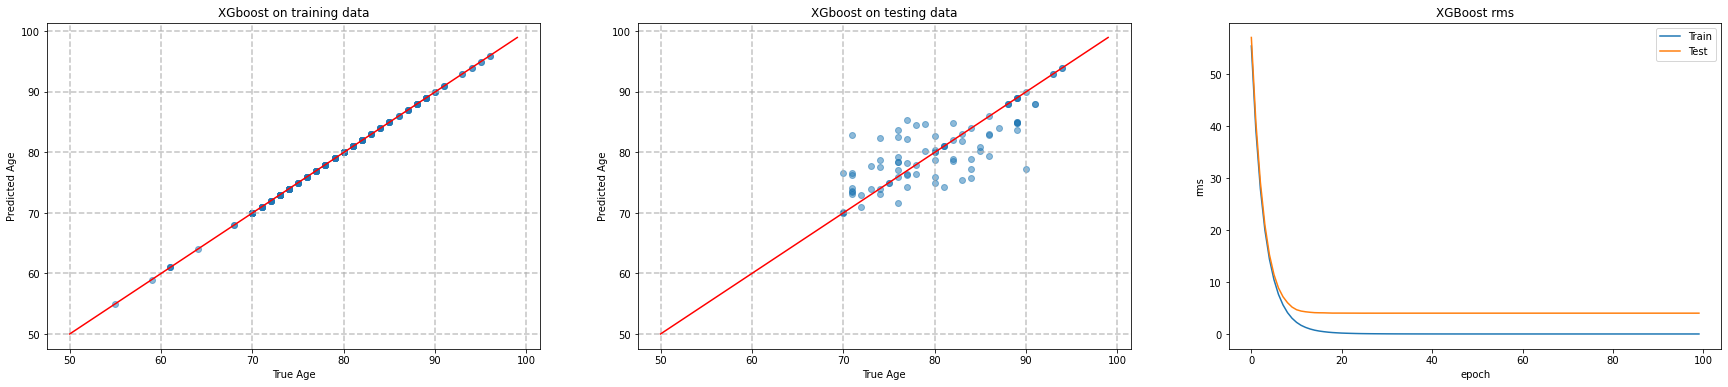

The number of training epochs was 100
The rms on the training data is 0.000 years
The rms on the testing data is 4.004 years
The r^2 on the training data is 1.000
The r^2 on the testing data is 0.643


In [315]:
X = alz_bld_top_xboost_no_na.iloc[:, 1:].to_numpy()
y = alz_bld_top_xboost_no_na[['AGE']].astype(float).astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 4, shuffle=True)
# Running XGBoost regressor with default settings on
XG, rms_train_xg, rms_test_xg, r2_train_xg, r2_test_xg, feature_importances_xg = xgboost_regress(X_train, X_test, Y_train, Y_test, early_stopping_rounds=None, plot=True,xmin=50)

In [337]:
cgs_xgb_alz = pd.Series(feature_importances_xg, index=alz_bld_top_xboost_no_na.columns[1:])
cgs_kept_xgb_alz = cgs_xgb_alz[abs(cgs_xgb_alz)>0.001]
cgs_kept_xgb_alz

sample_id
cg09252331    0.004247
cg09255966    0.004523
cg10115022    0.008273
cg11987231    0.003272
cg15728256    0.023604
                ...   
cg11875060    0.017590
cg13250285    0.003224
cg23320649    0.033831
cg25478614    0.001302
cg26158023    0.020831
Length: 85, dtype: float32

In [338]:
park_xgb_cpg_names=list(cgs_kept_xgb_park.index)
alz_xgb_cpg_names=list(cgs_kept_xgb_alz.index)
both_xgb=[]
for i in park_xgb_cpg_names:
    if i in alz_xgb_cpg_names:
        both_xgb.append(i)

In [339]:
len(both_xgb)

15

In [340]:
print(both_xgb)
print(both_lasso)

['cg10115022', 'cg10179045', 'cg07553761', 'cg11977142', 'cg06540876', 'cg16867657', 'cg07955995', 'cg19381766', 'cg14209949', 'cg23631669', 'cg04875128', 'cg04503319', 'cg24983120', 'cg03773731', 'cg00481951']
['cg11987231', 'cg27222785', 'cg20495333', 'cg23606718', 'cg25731401', 'cg07553761', 'cg10616795', 'cg16867657', 'cg19149031', 'cg07927379', 'cg13493048', 'cg23091758', 'cg04875128', 'cg00962707', 'cg14692377', 'cg15223933', 'cg24983120', 'cg00002033', 'cg04295144', 'cg05213896', 'cg06437747', 'cg16297569', 'cg22948959', 'cg24865132', 'cg14674720', 'cg22112832']


In [341]:
for i in both_lasso:
    if i in both_xgb:
        print(i)

cg07553761
cg16867657
cg04875128
cg24983120


In [342]:
cpg_xgb=list(cpg_xgb)

In [354]:
sort_cpgs_xgb_alz=list(cgs_kept_xgb_alz.sort_values(ascending=False).index)
sort_cpgs_xgb_park=list(cgs_kept_xgb_park.sort_values(ascending=False).index)
for i in both_xgb:
    
    if i in cpg_xgb:
        
        print('|',i,' Healthy = ',cpg_xgb.index(i),' Alz = ',sort_cpgs_xgb_alz.index(i),' Park = ',sort_cpgs_xgb_park.index(i),'|')


| cg10115022  Healthy =  1956  Alz =  29  Park =  78 |
| cg10179045  Healthy =  443  Alz =  54  Park =  58 |
| cg07553761  Healthy =  4  Alz =  13  Park =  10 |
| cg11977142  Healthy =  925  Alz =  20  Park =  51 |
| cg06540876  Healthy =  58  Alz =  27  Park =  12 |
| cg16867657  Healthy =  1  Alz =  2  Park =  0 |
| cg07955995  Healthy =  62  Alz =  40  Park =  39 |
| cg19381766  Healthy =  775  Alz =  10  Park =  3 |
| cg14209949  Healthy =  2133  Alz =  64  Park =  32 |
| cg23631669  Healthy =  663  Alz =  84  Park =  37 |
| cg04875128  Healthy =  2  Alz =  6  Park =  1 |
| cg04503319  Healthy =  93  Alz =  42  Park =  69 |
| cg24983120  Healthy =  1359  Alz =  62  Park =  54 |
| cg03773731  Healthy =  267  Alz =  36  Park =  16 |
| cg00481951  Healthy =  357  Alz =  70  Park =  71 |


In [345]:
cgs_kept_xgb_alz.sort_values(ascending=False)

sample_id
cg02553054    0.079682
cg08160331    0.068901
cg16867657    0.064828
cg00300216    0.059639
cg15138614    0.057017
                ...   
cg24883605    0.001111
cg05625834    0.001106
cg08197569    0.001105
cg12065799    0.001008
cg23631669    0.001003
Length: 85, dtype: float32

In [329]:
cgs_kept_xgb_alz.loc['cg10179045']

0.0024599286